In [132]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [133]:
import numpy as np
import pandas as pd

In [170]:
import datetime as dt

'2018-08-07'

# Reflect Tables into SQLAlchemy ORM

In [198]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, MetaData
from sqlalchemy import table, text

In [136]:
engine = create_engine("sqlite:///hawaii.sqlite")
metadata = MetaData()
metadata.reflect(bind=engine)
Measurement = metadata.tables['measurement']
Station = metadata.tables['station']
Measurement

Table('measurement', MetaData(bind=None), Column('id', INTEGER(), table=<measurement>, primary_key=True, nullable=False), Column('station', TEXT(), table=<measurement>), Column('date', TEXT(), table=<measurement>), Column('prcp', FLOAT(), table=<measurement>), Column('tobs', FLOAT(), table=<measurement>), schema=None)

In [137]:
# reflect an existing database into a new model
#Base = automap_base()
# reflect the tables
#Base.prepare(engine, reflect=True)

In [140]:
# We can view all of the classes that automap found
#Base.classes.keys()
df = pd.DataFrame()
df

""


In [141]:
# Save references to each table
#Measurement = Base.classes.measurement
#Station = Base.classes.station

In [146]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

<IPython.core.display.Javascript object>


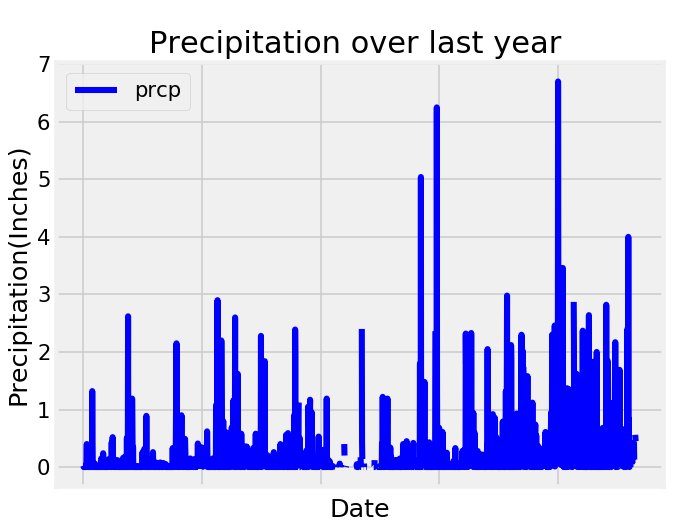

Text(0.5,1,'Precipitation over last year ')

In [212]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from today. Change # days from 730 to whatever duration is desrired

date = dt.date.today()
date = date - dt.timedelta(days=730)
date.isoformat()

# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data

# Rotate the xticks for the dates

results = session.query(Measurement).from_statement(text("SELECT * FROM Measurement where date>:date")).params(date=date).all()
results
df_measurement = pd.DataFrame(data=results)
df_measurement

df_measurement.plot(x='date',y='prcp',color='blue')
plt.xlabel('Date')
plt.ylabel('Precipitation(Inches)')
plt.title('Precipitation over last year ')


In [213]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_measurement.describe()

,id,prcp,tobs
count,2328.000000,2110.000000,2328.000000
mean,10151.700601,0.177972,74.746993
std,5599.964161,0.459208,4.611694
min,2349.000000,0.000000,58.000000
25%,5281.750000,0.000000,72.000000
50%,8926.500000,0.020000,76.000000
75%,14741.250000,0.130000,78.000000
max,19550.000000,6.700000,87.000000


In [290]:
# How many stations are available in this dataset?
len(df_measurement['station'].unique())


7

In [320]:
# What are the most active stations?
# List the stations and the counts in descending order.
#df_sorted = df_measurement.groupby(['station']).count().sort_values('id',ascending=False)
df_sorted = df_measurement.groupby(['station'],sort=True).count()
df_sorted.sort_values('id',ascending=False)

#active_station

,id,date,prcp,tobs
station,,,,
USC00519397,376,376,374,376
USC00519281,367,367,367,367
USC00516128,364,364,343,364
USC00513117,358,358,358,358
USC00519523,352,352,329,352
USC00514830,318,318,276,318
USC00517948,193,193,63,193


In [238]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
df_temp = df_measurement[['station','tobs']].groupby(['tobs']).min()
df_temp.head(1)
df_temp.tail(1)

,station
tobs,
87.0,USC00517948


<IPython.core.display.Javascript object>


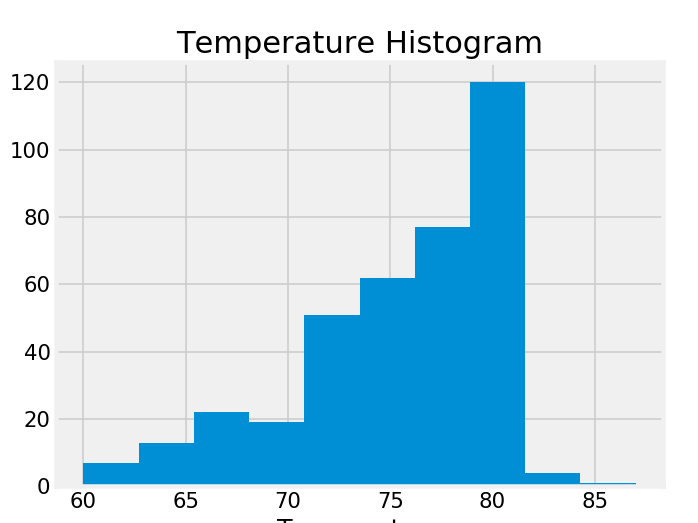

Text(0.5,1,'Temperature Histogram')

In [331]:

# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

df_active_station = df_measurement[(df_measurement.station == 'USC00519397')] 
df_active_station
df_active_station.hist(column='tobs')
plt.xlabel('Temperature')
plt.ylabel('#Observations')
plt.title('Temperature Histogram')


[(62.0, 69.57142857142857, 74.0)]


62.0 68.36585365853658 74.0


<IPython.core.display.Javascript object>


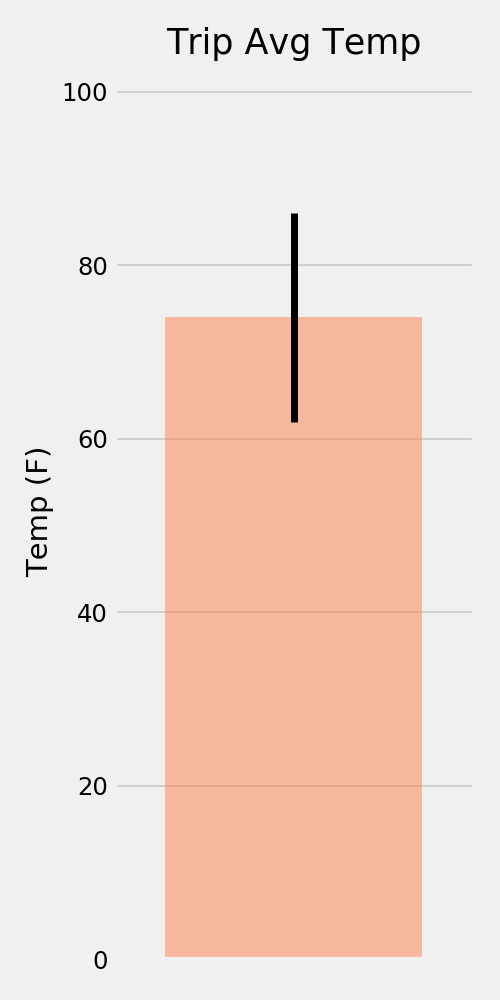

In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


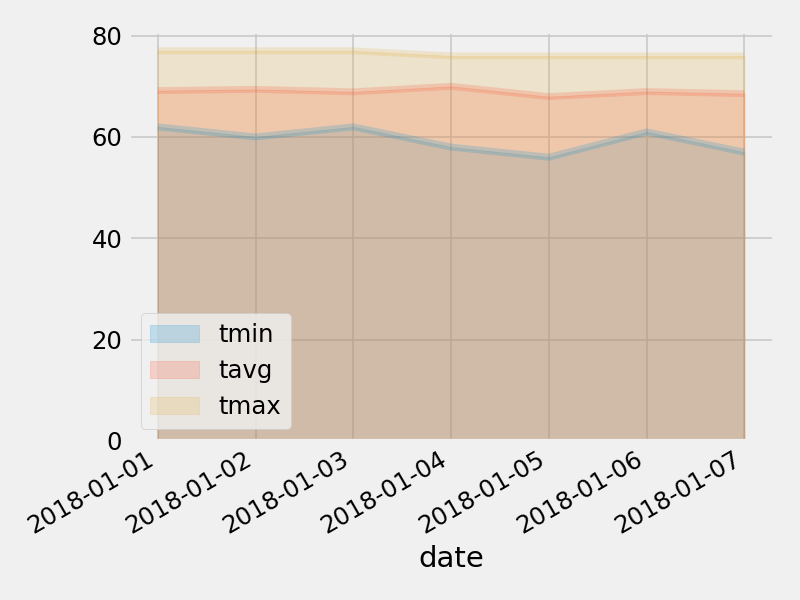

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
